#IMPORTS

In [1]:
pip install gower

In [2]:
from sklearn.cluster         import DBSCAN
from sklearn.decomposition   import PCA
from mpl_toolkits            import mplot3d

import pandas            as pd
import seaborn           as sns
import numpy             as np
import matplotlib.pyplot as plt

import gower

##Loading data

In [3]:
# Creating a dictionary with the data
dictionary = { 'age':            [22, 25, 30, 38, 42, 47, 55, 62, 61, 90], 
               'gender':         ['M', 'M', 'F', 'F', 'F', 'M', 'M', 'M', 'M', "M"], 
               'civil_status':   ['SINGLE', 'SINGLE', 'SINGLE', 'MARRIED', 'MARRIED', 'SINGLE', 'MARRIED', 'DIVORCED', 'MARRIED', 'DIVORCED'], 
               'salary':         [18000, 23000, 27000, 32000, 34000, 20000, 40000, 42000, 25000, 70000], 
               'has_children':   [False, False, False, True, True, False, False, False, False, True], 
               'purchaser_type': ['LOW_PURCHASER', 'LOW_PURCHASER', 'LOW_PURCHASER', 'HEAVY_PURCHASER', 'HEAVY_PURCHASER', 'LOW_PURCHASER', 'MEDIUM_PURCHASER', 'MEDIUM_PURCHASER', 'MEDIUM_PURCHASER', 'LOW_PURCHASER']}

# Creating a Pandas DataFrame from the dictionary
df = pd.DataFrame.from_dict(dictionary)
df

,age,gender,civil_status,salary,has_children,purchaser_type
0,22,M,SINGLE,18000,False,LOW_PURCHASER
1,25,M,SINGLE,23000,False,LOW_PURCHASER
2,30,F,SINGLE,27000,False,LOW_PURCHASER
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER
5,47,M,SINGLE,20000,False,LOW_PURCHASER
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER
9,90,M,DIVORCED,70000,True,LOW_PURCHASER


#IMPLEMENTING GOWER

In [4]:
#Distance matrix
distance_matrix = gower.gower_matrix(df)
distance_matrix=pd.DataFrame(data=distance_matrix,columns=['c1','c2','c3','c4','c5','c6','c7','c8','c9','10'])
distance_matrix

,c1,c2,c3,c4,c5,c6,c7,c8,c9,10
0,0.000000,0.023379,0.215121,0.750754,0.766968,0.067685,0.484729,0.508296,0.451357,0.666667
1,0.023379,0.000000,0.191742,0.727376,0.743590,0.063537,0.461350,0.484917,0.427979,0.643288
2,0.215121,0.191742,0.000000,0.535634,0.551848,0.230769,0.602941,0.626508,0.582391,0.784879
3,0.750754,0.727376,0.535634,0.000000,0.016214,0.727187,0.567308,0.757541,0.578808,0.749246
4,0.766968,0.743590,0.551848,0.016214,0.000000,0.723793,0.551094,0.741327,0.575415,0.733032
5,0.067685,0.063537,0.230769,0.727187,0.723793,0.000000,0.417044,0.440611,0.383673,0.598982
6,0.484729,0.461350,0.602941,0.567308,0.551094,0.417044,0.000000,0.190234,0.062783,0.681938
7,0.508296,0.484917,0.626508,0.757541,0.741327,0.440611,0.190234,0.000000,0.223605,0.491704
8,0.451357,0.427979,0.582391,0.578808,0.575415,0.383673,0.062783,0.223605,0.000000,0.715309
9,0.666667,0.643288,0.784879,0.749246,0.733032,0.598982,0.681938,0.491704,0.715309,0.000000


In [5]:
# Configuring the parameters of the clustering algorithm
dbscan_cluster = DBSCAN(eps=0.3, 
                        min_samples=2, 
                        metric="precomputed")

# Fitting the clustering algorithm
dbscan_cluster.fit(distance_matrix)

# Adding the results to a new column in the dataframe
df["cluster"] = dbscan_cluster.labels_
df

,age,gender,civil_status,salary,has_children,purchaser_type,cluster
0,22,M,SINGLE,18000,False,LOW_PURCHASER,0
1,25,M,SINGLE,23000,False,LOW_PURCHASER,0
2,30,F,SINGLE,27000,False,LOW_PURCHASER,0
3,38,F,MARRIED,32000,True,HEAVY_PURCHASER,1
4,42,F,MARRIED,34000,True,HEAVY_PURCHASER,1
5,47,M,SINGLE,20000,False,LOW_PURCHASER,0
6,55,M,MARRIED,40000,False,MEDIUM_PURCHASER,2
7,62,M,DIVORCED,42000,False,MEDIUM_PURCHASER,2
8,61,M,MARRIED,25000,False,MEDIUM_PURCHASER,2
9,90,M,DIVORCED,70000,True,LOW_PURCHASER,-1


In [7]:
#Dimensionality reduction
pca = PCA(n_components=3)
pca_reduction=pca.fit_transform(distance_matrix) 
pca_reduction=pd.DataFrame(data=pca_reduction,columns=['X','Y','Z'])

pca_reduction['cluster']=dbscan_cluster.labels_
pca_reduction

,X,Y,Z,cluster
0,-0.662247,-0.284786,0.041267,0
1,-0.658688,-0.271063,0.014308,0
2,-0.259512,-0.554957,-0.040297,0
3,1.004735,-0.327094,-0.136700,1
4,1.017523,-0.294062,-0.131255,1
5,-0.635447,-0.178698,0.003756,0
6,0.011899,0.531085,-0.330100,2
7,-0.101324,0.637161,0.047938,2
8,-0.048054,0.486439,-0.349504,2
9,0.331115,0.255974,0.880587,-1


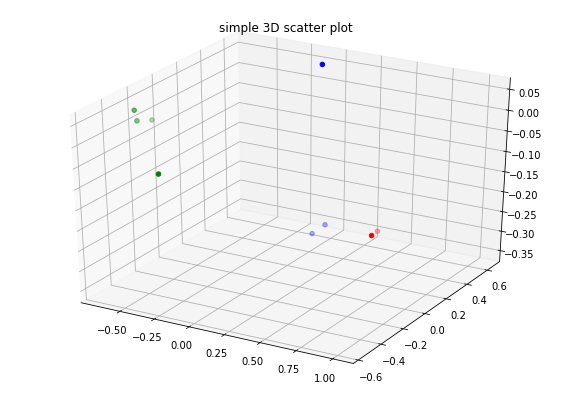

In [8]:
# Creating dataset
z1 = pca_reduction[pca_reduction['cluster']==0]['Z']
x1 = pca_reduction[pca_reduction['cluster']==0]['X']
y1 = pca_reduction[pca_reduction['cluster']==0]['Y']

z2 = pca_reduction[pca_reduction['cluster']==1]['Z']
x2 = pca_reduction[pca_reduction['cluster']==1]['X']
y2 = pca_reduction[pca_reduction['cluster']==1]['Y']

z3 = pca_reduction[pca_reduction['cluster']==2]['Z']
x3 = pca_reduction[pca_reduction['cluster']==2]['X']
y3 = pca_reduction[pca_reduction['cluster']==2]['Y'] 
 
# Creating figure
fig = plt.figure(figsize = (10, 7))
ax = plt.axes(projection ="3d")
 
# Creating plot
ax.scatter3D(x1, y1, z1, color = "green")
ax.scatter3D(x2, y2, z2, color = "red")
ax.scatter3D(x3, y3, z3, color = "blue")

plt.title("simple 3D scatter plot")
 
# show plot
plt.show()